In diesem Arbeitsblatt bauen Sie eine Blume mit Python for-loops und
PyTamaro.

In der folgenden Zelle werden zuerst 
[alle von PyTamaro zur Verfügung gestellten
Funktionen](https://pytamaro.readthedocs.io/en/stable/German/index.html)
importiert.

In [2]:
from pytamaro.de import *

Das Ziel ist es, eine Blume wie die abgebildete zu zeichnen.

![Blume](blume_komplett.svg)

Die wichtigsten Funktionen von PyTamaro für diese Aufgabe sind
`fixiere()` und `kombiniere()`.

Die Funktion `fixiere()` legt für eine Grafik einen frei gewählten
Ankerpunkt fest. Dazu muss man wissen, dass jede in PyTamaro gezichnete
Grafik von einer sogenannten "Bounding Box" umgeben ist. Diese
Bounding Box ist ein Rechteck, das die Grafik vollständig umschliesst.
Standardmässig liegt der Ankerpunkt einer Grafik in der Mitte der
Bounding Box. Mit `fixiere()` kann man den Ankerpunkt jedoch an eine andere
Stelle der Bounding Box verschieben. PyTamaro stellt die folgenden
Positionen für Ankerpunkte zur Verfügung:

* `mitte`: Mitte der Bounding Box (Standard)
* `mitte_links`: Mitte der linken Seite der Bounding Box
* `mitte_rechts`: Mitte der rechten Seite der Bounding Box
* `oben_links`: Obere linke Ecke der Bounding Box
* `oben_mitte`: Mitte der oberen Seite der Bounding Box
* `oben_rechts`: Obere rechte Ecke der Bounding Box
* `unten_links`: Untere linke Ecke der Bounding Box
* `unten_mitte`: Mitte der unteren Seite der Bounding Box
* `unten_rechts`: Obere rechte Ecke der Bounding Box

Der Ankerpunkt wird mit dem Befehl `fixiere(position, grafik)` gesetzt.

Der Ankerpunkt ist wichtig für die Funktion `drehe()`, die eine Grafik um
einen bestimmten Winkel dreht. Die Drehung erfolgt immer um den
Ankerpunkt.

Die Funktion `kombiniere(vordere Grafik, hintere Grafik)` fügt zwei
Grafiken zusammen. Die erste 
gegebene Grafik liegt im Vordergrund und die zweite 
im Hintergrund. Die Grafiken werden so ausgerichtet, dass ihre
Ankerpunkte übereinanderliegen.

## Schritt 1: Zerlege das Bild in seine Einzelteile

Die Blume besteht im wesentlichen aus zwei Formen:

1. Blütenblätter in Form von Ellipsen sowie
2. einer Scheibe in der Form eines Kreises in der Mitte.

Um die Blume zu zeichnen, müssen diese beiden Formen zuerst einzeln
erstellt werden.

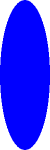

In [ ]:
bluetenblatt = ellipse(50, 150, blau)
# die Farbe blau wurde gewhält, damit das Blatt vor dem Hintergrund
# sichtbar ist

zeige_grafik(bluetenblatt)

In [ ]:
scheibe = ellipse(30, 30, rot)
zeige_grafik(scheibe)

## Schritt 2: Positioniere die Blütenblätter

Die Blütenblätter sind rund um die Mitte der Blume angeordnet. Da es
zwölf Blütenblätter sind, beträgt der Winkel zwischen zwei Blütenblättern
$\frac{360°}{12} = 30°$. Die Drehung der Blütenblätter erfolgt um den
Ankerpunkt `unten_mitte` der Blütenblätter.  
Die Blütenblätter müssen also zuerst fixiert und dann gedreht werden.

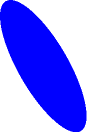

In [ ]:
bluetenblatt_fixiert = fixiere(unten_mitte, bluetenblatt)
bluetenblatt_30 = drehe(30, bluetenblatt_fixiert)
zeige_grafik(bluetenblatt_30)

## Schritt 3: Zeichnen aller erforderlichen Blütenblätter

Die Blume hat zwölf Blütenblätter. Diese können von Hand jedes einzelne
erstellt werden. Das dritte Blütenblatt ist um 60° gedreht und wird
entsprechend mit

```python
bluetenblatt_60 = drehe(60, bluetenblatt_fixiert)
```
erstllt. Das kann man für alle zwölf Blütenblätter machen bis man beim zwölften
Blütenblatt angekommen ist, das um 330° gedreht ist.

```python
bluetenblatt_330 = drehe(330, bluetenblatt_fixiert)
```
Das ist aber sehr mühsam und fehleranfällig. Viel einfacher ist es, eine Schlaufe
(`for`-loop) zu verwenden, die die Blütenblätter basierend auf der
Grundform automatisch erstellt.

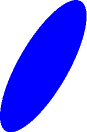

In [ ]:
for i in range(12):
    winkel = i * 30
    bluetenblatt_gedreht = drehe(winkel, bluetenblatt_fixiert)

zeige_grafik(bluetenblatt_gedreht)

Diese Schlaufe durchläuft die Zahlen von 0 bis 11 (also 12 Zahlen) und
berechnet für jede Zahl den entsprechenden Drehwinkel. Dann wird das
Blütenblatt um diesen Winkel gedreht. Allerdings wird das gedrehte
Blütenblatt in jeder Iteration der Schlaufe in der gleichen Variable
`bluetenblatt_gedreht` gespeichert. Am Ende der Schlaufe enthält diese
Variable nur das letzte gedrehte Blütenblatt (das um 330° gedrehte
Blütenblatt).

## Schritt 4: Kombiniere alle Blütenblätter

Um das unerwünschte Verhalten zu vermeiden, dass am Ende der Schlaufe nur
das letzte gedrehte Blütenblatt in der Variable `bluetenblatt_gedreht`
enthalten ist, müssen die gedrehten Blütenblätter in jeder Iteration der
gewünschten Gesamtgrafik hinzugefügt werden. Dazu wird die Funktion
`kombiniere()` verwendet.

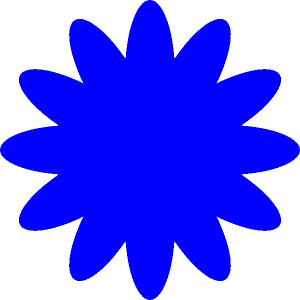

In [ ]:
blume = bluetenblatt_fixiert

for i in range(12):
    winkel = i * 30
    bluetenblatt_gedreht = drehe(winkel, bluetenblatt_fixiert)
    blume = kombiniere(blume, bluetenblatt_gedreht)
    
zeige_grafik(blume)

Damit sind die Blütenblätter in der gewünschten Position und Anzahl
zusammengefügt. Damit Sie allerdings aussehen, wie die Blume in der
Vorlage, müssen die einzelnen Blütenblätter weiss eingefärbt und mit
einem rosa Rand versehen werden.

Rosa ist keine vordefinierte Farbe in PyTamaro. Sie können jedoch eine
beliebige Farbe mit der Funktion `rgb_farbe(rot, gruen, blau)`
erstellen. Dabei sind `rot`, `gruen` und `blau` Zahlenwerte von 0 bis 255, die
den Anteil der jeweiligen Farbe an der Gesamtfarbe angeben. Damit nicht
alle Kombinationen durchprobiert werden müssen, können Sie mit einem
Online-Tool wie [RGB Color
Picker](https://www.w3schools.com/colors/colors_rgb.asp) 
die gewünschte Farbe auswählen und die entsprechenden Werte für rot,
grün und blau ablesen. 

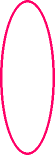

In [ ]:
weisses_blatt = ellipse(50, 150, weiss)
rosa_rand = ellipse(55, 155, rgb_farbe(255, 0, 102))

bluetenblatt_mit_rand = ueberlagere(weisses_blatt, rosa_rand)

zeige_grafik(bluetenblatt_mit_rand)

Anschliessend können die Blütenblätter mit Rand in der vorher
geschriebenen Schlaufe zur Gesamtgrafik zusammengefügt werden.

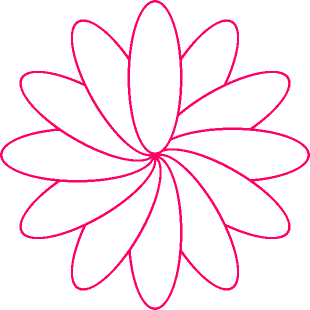

In [ ]:
bluetenblatt_mit_rand_fixiert = fixiere(unten_mitte, bluetenblatt_mit_rand)

blume_weiss = bluetenblatt_mit_rand_fixiert

for i in range(12):
    winkel = i * 30
    bluetenblatt_gedreht = drehe(winkel, bluetenblatt_mit_rand_fixiert)
    blume_weiss = kombiniere(blume_weiss, bluetenblatt_gedreht)
    
zeige_grafik(blume_weiss)

## Schritt 5: Scheibe im Zentrum der Blume

Bei genauer Betrachtung der Blume fällt auf, dass die Scheibe in der
Mitte der Blume nicht einfach einfarbig gelb ist, sondern gegen die Mitte
hin einen Farbverlauf aufweist. Diesen Farbverlauf wird erzeugt, indem
mehrere Kreise mit kleiner werdendem Radius und abnehmender Farbintensität
übereinandergelegt werden.

In [ ]:
scheibe = ellipse(30, 30, rgb_farbe(255, 0, 0))

for i in range(1, 8):
    tmp = ellipse(30 - 3*i, 30 - 3*i, rgb_farbe(255, i*26, i*26))
    scheibe = ueberlagere(tmp, scheibe)
    
zeige_grafik(scheibe)

Zum Schluss wird die Scheibe auf die Blütenblätter gelegt und Blume so
vervollständigt.

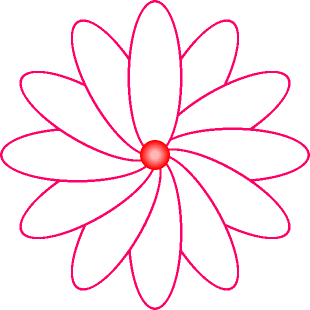

In [16]:
blume_komplett = ueberlagere(scheibe, blume_weiss)
zeige_grafik(blume_komplett)

In [17]:
speichere_grafik('blume_komplett.svg', blume_komplett)

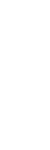

In [11]:
petal = ellipse(50, 150, weiss)
zeige_grafik(petal)  


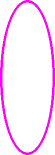

In [14]:
rim = ellipse(55, 155, rose)
rimed_petal = ueberlagere(petal, rim)
zeige_grafik(rimed_petal)

In [15]:
fixed_petal = fixiere(unten_mitte, rimed_petal)

In [36]:
dot = ellipse(30, 30, gelb)
zeige_grafik(dot)

In [13]:
rose = rgb_farbe(252, 3, 244)
rose_dot = ellipse(30, 30, rose)
zeige_grafik(rose_dot)

In [16]:
petal_30 = drehe(30, fixed_petal)
petal_60 = drehe(60, fixed_petal)
petal_90 = drehe(90, fixed_petal)
petal_120 = drehe(120, fixed_petal)
petal_150 = drehe(150, fixed_petal)
petal_180 = drehe(180, fixed_petal)
petal_210 = drehe(210, fixed_petal)
petal_240 = drehe(240, fixed_petal)
petal_270 = drehe(270, fixed_petal)
petal_300 = drehe(300, fixed_petal)
petal_330 = drehe(330, fixed_petal)

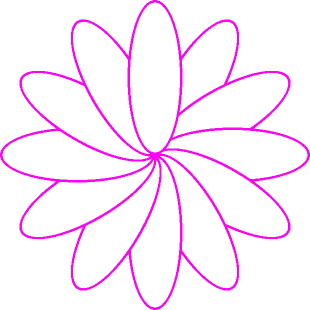

In [43]:
flower = kombiniere(fixed_petal, petal_30)
flower = kombiniere(flower, petal_60)
flower = kombiniere(flower, petal_90)
flower = kombiniere(flower, petal_120)
flower = kombiniere(flower, petal_150)
flower = kombiniere(flower, petal_180)
flower = kombiniere(flower, petal_210)
flower = kombiniere(flower, petal_240)
flower = kombiniere(flower, petal_270)
flower = kombiniere(flower, petal_300)
flower = kombiniere(flower, petal_330)
zeige_grafik(flower)

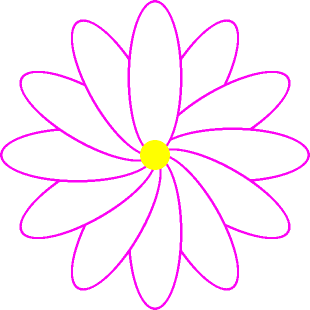

In [44]:
complete_flower = kombiniere(dot, flower)
zeige_grafik(complete_flower)

In [19]:
flower_automated = fixed_petal
for i in range(30, 360, 30):
    rotated_petal = drehe(i, fixed_petal)
    flower_automated = kombiniere(flower_automated, rotated_petal)

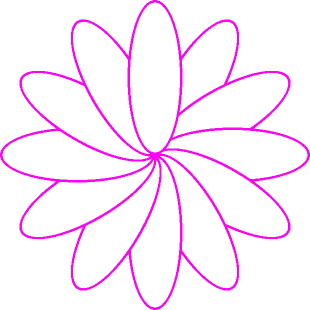

In [46]:
zeige_grafik(flower_automated)

In [8]:
dot_1 = ellipse(30, 30, rgb_farbe(255, 0, 0))
dot_2 = ellipse(28, 28, rgb_farbe(255, 26, 26))
dot_3 = ellipse(26, 26, rgb_farbe(255, 51, 51))
dot_4 = ellipse(24, 24, rgb_farbe(255, 77, 77))
dot_5 = ellipse(22, 22, rgb_farbe(255, 102, 102))
dot_6 = ellipse(20, 20, rgb_farbe(255, 128, 128))
dot_7 = ellipse(18, 18, rgb_farbe(255, 153, 153))
dot_8 = ellipse(16, 16, rgb_farbe(255, 179, 179))

In [21]:
middle = ueberlagere(dot_8, dot_7)
middle = ueberlagere(middle, dot_6)
middle = ueberlagere(middle, dot_5)
middle = ueberlagere(middle, dot_4)
middle = ueberlagere(middle, dot_3)
middle = ueberlagere(middle, dot_2)
middle = ueberlagere(middle, dot_1)

zeige_grafik(middle)

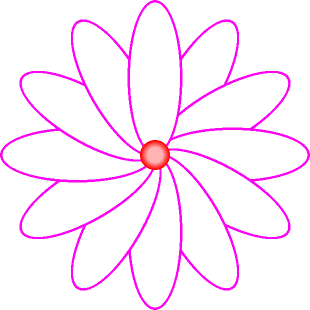

In [22]:
flower_with_middle = ueberlagere(middle, flower_automated)
zeige_grafik(flower_with_middle)

In [24]:
dot_0 = ellipse(30, 30, rgb_farbe(255, 0, 0))

for i in range(1, 8):
    dot = ellipse(30 - 3*i, 30 - 3*i, rgb_farbe(255, i*26, i*26))
    dot_0 = ueberlagere(dot, dot_0)
    
zeige_grafik(dot_0)

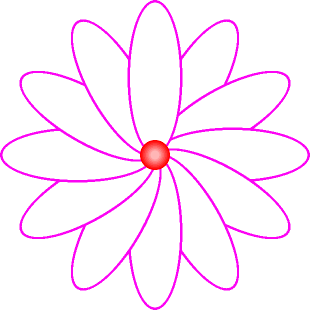

In [28]:
result = ueberlagere(dot_0, flower_automated)
zeige_grafik(result)
speichere_grafik('blume.png', result)